## importing libreries  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

## Reading the data

In [2]:
df = pd.read_csv('adult.data.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Exploring the data

##### Missing header

In [3]:
df.columns=["age","workclass","fnlwgt","education" ,"education-num","marital-status",
                         "occupation","relationship","race","sex","capital-gain","capital-loss",
                        "hours-per-week","native-country","income"]
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


##### Data description

In [4]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Noise detection

In [6]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
income                2
dtype: int64

In [7]:
df['income'].value_counts()/df['income'].count()

 <=50K    0.75919
 >50K     0.24081
Name: income, dtype: float64

C:\Users\joegh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


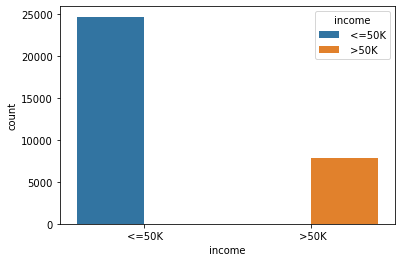

In [8]:
sns.countplot(df['income'], hue='income', data=df);

## Dealing with noise

In [9]:
df = df.drop('fnlwgt', axis=1)
df = df.drop('education-num', axis=1)
df.nunique()

age                73
workclass           9
education          16
marital-status      7
occupation         15
relationship        6
race                5
sex                 2
capital-gain      119
capital-loss       92
hours-per-week     94
native-country     42
income              2
dtype: int64

## Dealing with null

In [10]:
df.isnull().sum()

age               0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [11]:
att = df.select_dtypes(include=object).columns.tolist()
for col in att:
    print(df[col].value_counts(dropna=False)/df.shape[0],'\n')

 Private             0.697030
 Self-emp-not-inc    0.078038
 Local-gov           0.064279
 ?                   0.056386
 State-gov           0.039864
 Self-emp-inc        0.034274
 Federal-gov         0.029483
 Without-pay         0.000430
 Never-worked        0.000215
Name: workclass, dtype: float64 

 HS-grad         0.322502
 Some-college    0.223918
 Bachelors       0.164461
 Masters         0.052916
 Assoc-voc       0.042443
 11th            0.036086
 Assoc-acdm      0.032769
 10th            0.028654
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013298
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th         0.005160
 Preschool       0.001566
Name: education, dtype: float64 

 Married-civ-spouse       0.459937
 Never-married            0.328092
 Divorced                 0.136452
 Separated                0.031479
 Widowed                  0.030497
 Married-spouse-absent    0.012837
 Married-AF-spouse        0.000706
N

In [12]:
# Convert '?' to NaNs
for col in att:
    df.loc[df[col]==' ?', col] = np.nan

In [13]:
df.isnull().sum()

age                  0
workclass         1836
education            0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [14]:
att = df.select_dtypes(include=object).columns.tolist()
for col in att:
    print(df[col].value_counts(dropna=False)/df.shape[0],'\n')

 Private             0.697030
 Self-emp-not-inc    0.078038
 Local-gov           0.064279
NaN                  0.056386
 State-gov           0.039864
 Self-emp-inc        0.034274
 Federal-gov         0.029483
 Without-pay         0.000430
 Never-worked        0.000215
Name: workclass, dtype: float64 

 HS-grad         0.322502
 Some-college    0.223918
 Bachelors       0.164461
 Masters         0.052916
 Assoc-voc       0.042443
 11th            0.036086
 Assoc-acdm      0.032769
 10th            0.028654
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013298
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th         0.005160
 Preschool       0.001566
Name: education, dtype: float64 

 Married-civ-spouse       0.459937
 Never-married            0.328092
 Divorced                 0.136452
 Separated                0.031479
 Widowed                  0.030497
 Married-spouse-absent    0.012837
 Married-AF-spouse        0.000706
N

# handling missing values


In [15]:
# use DataFrame `mode()` method
df = df.fillna(df.mode().iloc[0])

In [16]:
df.isnull().sum()

age               0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

##### Checking outliers

In [17]:
print(f"There's {df[df['capital-gain'] == 99999].shape[0]} outlier in the capital-gain column")
print(f"There's {df[df['hours-per-week'] == 99].shape[0]} outlier in the hours-per-week column")

There's 159 outlier in the capital-gain column
There's 85 outlier in the hours-per-week column


##### Replace it with the mean

In [18]:
df['capital-gain'].replace(99999, np.mean(df['capital-gain'].values), inplace=True)
df['hours-per-week'].replace(99, np.mean(df['hours-per-week'].values), inplace=True)
print(df.describe())

                age  capital-gain  capital-loss  hours-per-week
count  32561.000000  32561.000000  32561.000000    32561.000000
mean      38.581647    594.601799     87.303830       40.284579
std       13.640433   2554.224665    402.960219       11.978418
min       17.000000      0.000000      0.000000        1.000000
25%       28.000000      0.000000      0.000000       40.000000
50%       37.000000      0.000000      0.000000       40.000000
75%       48.000000      0.000000      0.000000       45.000000
max       90.000000  41310.000000   4356.000000       98.000000


## Feature engineering

In [19]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

##### Feature reduction

In [20]:
# reducing the number of categories in education
df.education= df.education.replace([' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th',' 10th', ' 11th', ' 12th'], 'school')
df.education = df.education.replace(' HS-grad', 'high school')
df.education = df.education.replace([' Assoc-voc', ' Assoc-acdm', ' Prof-school', ' Some-college'], 'higher')
df.education = df.education.replace(' Bachelors', 'undergrad')
df.education = df.education.replace(' Masters', 'grad')
df.education = df.education.replace(' Doctorate', 'doc')

In [21]:
# reducing the number of categories in material-status
df['marital-status']= df['marital-status'].replace([' Married-civ-spouse', ' Married-AF-spouse'], 'married')
df['marital-status']= df['marital-status'].replace([' Never-married'], 'not-married')
df['marital-status']= df['marital-status'].replace([' Divorced', ' Separated',' Widowed',
                                                   ' Married-spouse-absent'], 'other')

In [22]:
# dealing with binary values for the income
df.income = df.income.replace(' <=50K', 0)
df.income = df.income.replace(' >50K', 1)

In [23]:
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,undergrad,not-married,Adm-clerical,Not-in-family,White,Male,2174.0,0,40.0,United-States,0
1,50,Self-emp-not-inc,undergrad,married,Exec-managerial,Husband,White,Male,0.0,0,13.0,United-States,0
2,38,Private,high school,other,Handlers-cleaners,Not-in-family,White,Male,0.0,0,40.0,United-States,0
3,53,Private,school,married,Handlers-cleaners,Husband,Black,Male,0.0,0,40.0,United-States,0
4,28,Private,undergrad,married,Prof-specialty,Wife,Black,Female,0.0,0,40.0,Cuba,0


In [24]:
df['education'].value_counts()

high school    10501
higher         10316
undergrad       5355
school          4253
grad            1723
doc              413
Name: education, dtype: int64

In [25]:
df['marital-status'].value_counts()

married        14999
not-married    10683
other           6879
Name: marital-status, dtype: int64

##### Checking the corrolation

In [26]:
df.corr()

,age,capital-gain,capital-loss,hours-per-week,income
age,1.000000,0.116763,0.057775,0.066255,0.234037
capital-gain,0.116763,1.000000,-0.050437,0.084869,0.309938
capital-loss,0.057775,-0.050437,1.000000,0.054711,0.150526
hours-per-week,0.066255,0.084869,0.054711,1.000000,0.235174
income,0.234037,0.309938,0.150526,0.235174,1.000000


##### Heatmap

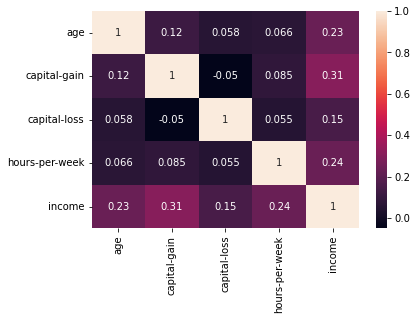

In [27]:
sns.heatmap(df.corr(), annot=True);

##### checking the distribution using histogram

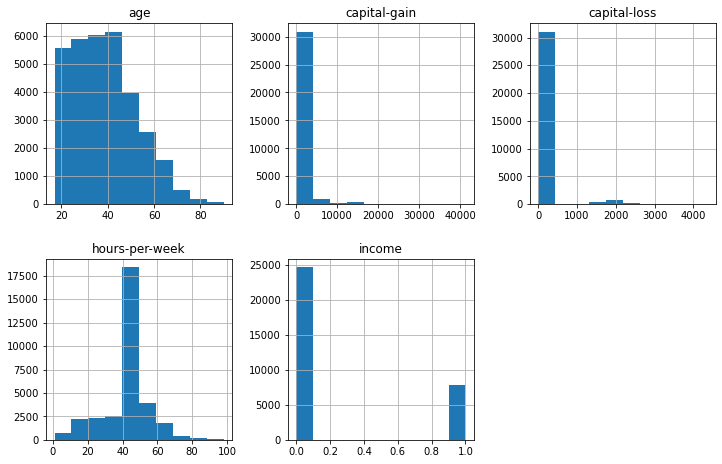

In [28]:
df.hist(figsize=(12,12), layout=(3,3), sharex=False);

##### Checking outliers

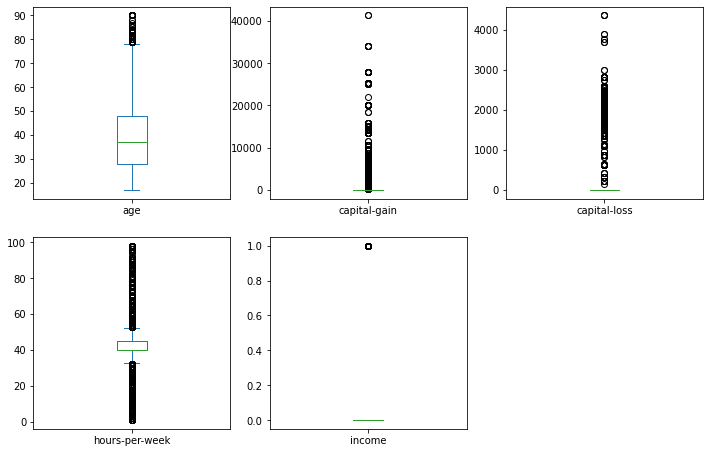

In [29]:
df.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True);

## Model building

In [30]:
X= df.drop(['income'], axis=1)
y = df['income']

##### Feature scaling

In [31]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [32]:
df1= df.copy()
df1= df1.apply(LabelEncoder().fit_transform)

In [33]:
ss= StandardScaler().fit(df1.drop('income', axis=1))

In [34]:
X= ss.transform(df1.drop('income', axis=1))
y= df['income']

##### Splitting the data

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

## Logistic regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

lr_model = lr.fit(X_train, y_train)
lr_prediction = lr_model.predict(X_test)

print("Acc on training data: {:,.3f}".format(lr.score(X_train, y_train)))
print("Acc on test data: {:,.3f}".format(lr.score(X_test, y_test)))

Acc on training data: 0.802
Acc on test data: 0.798


## Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc_model = rfc.fit(X_train, y_train)
rfc_prediction = rfc_model.predict(X_test)

print("Acc on training data: {:,.3f}".format(rfc.score(X_train, y_train)))
print("Acc on test data: {:,.3f}".format(rfc.score(X_test, y_test)))

Acc on training data: 0.976
Acc on test data: 0.844


## Clasification report

In [167]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

##### Logistic regression results

In [168]:
print(confusion_matrix(y_test, lr_prediction))
print(classification_report(y_test, lr_prediction))

[[6912  485]
 [1487  885]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.88      7397
           1       0.65      0.37      0.47      2372

    accuracy                           0.80      9769
   macro avg       0.73      0.65      0.67      9769
weighted avg       0.78      0.80      0.78      9769



##### Random Forest Classifier results

In [169]:
print(confusion_matrix(y_test, rfc_prediction))
print(classification_report(y_test, rfc_prediction))
#Precision: tp/tp+fp
# recall= tp/tp+fn

[[6743  654]
 [ 907 1465]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      7397
           1       0.69      0.62      0.65      2372

    accuracy                           0.84      9769
   macro avg       0.79      0.76      0.77      9769
weighted avg       0.84      0.84      0.84      9769



In [170]:
# import xgboost as xgb

## Clustering

In [171]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


In [172]:
ndf=df1.drop('income', axis=1)
#Load Data
pca = PCA(2)

#Transform the data
df2 = pca.fit_transform(ndf)
df2.shape


(32561, 2)

In [173]:
kmeans = KMeans(n_clusters=2)
res=kmeans.fit_predict(df2)

In [174]:
pca = PCA(n_components = 2) # Choose number of components
mle=pca.fit(df2) # fit on X_train if train/test split applied

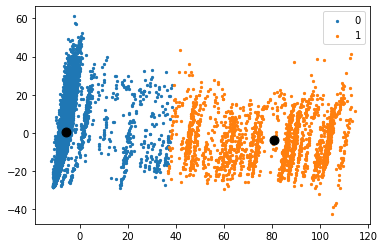

In [175]:
#Getting unique labels
centroids = kmeans.cluster_centers_ 
u_labels = np.unique(res)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df2[res == i , 0] , df2[res == i , 1] , label =i,s=5)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

##### choosing the optimal cluster number with elbow method

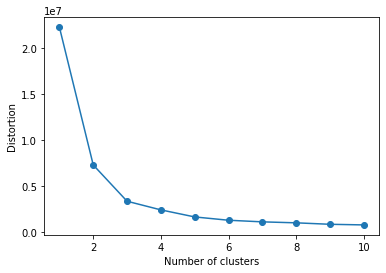

In [176]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df2)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

##### Getting the categorical values

In [38]:
dst=df[['education','workclass','marital-status','occupation','relationship','race','sex','native-country']]
dst

,education,workclass,marital-status,occupation,relationship,race,sex,native-country
0,undergrad,State-gov,not-married,Adm-clerical,Not-in-family,White,Male,United-States
1,undergrad,Self-emp-not-inc,married,Exec-managerial,Husband,White,Male,United-States
2,high school,Private,other,Handlers-cleaners,Not-in-family,White,Male,United-States
3,school,Private,married,Handlers-cleaners,Husband,Black,Male,United-States
4,undergrad,Private,married,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
32556,higher,Private,married,Tech-support,Wife,White,Female,United-States
32557,high school,Private,married,Machine-op-inspct,Husband,White,Male,United-States
32558,high school,Private,other,Adm-clerical,Unmarried,White,Female,United-States
32559,high school,Private,not-married,Adm-clerical,Own-child,White,Male,United-States


In [39]:
items = set()
for col in dst:
    items.update(dst[col].unique())
print(items)

{' Husband', ' Mexico', ' Haiti', ' Poland', ' Laos', ' Self-emp-not-inc', ' Protective-serv', 'higher', ' Cuba', ' Amer-Indian-Eskimo', ' South', ' Tech-support', ' Hong', ' White', ' Peru', ' Federal-gov', ' Never-worked', ' Prof-specialty', ' Nicaragua', ' Without-pay', ' England', ' Unmarried', ' Greece', ' Transport-moving', ' State-gov', ' Columbia', ' Local-gov', ' China', ' Guatemala', 'doc', ' Outlying-US(Guam-USVI-etc)', ' Japan', ' Yugoslavia', ' Scotland', 'other', ' Not-in-family', ' Thailand', ' Cambodia', ' Other-relative', ' Priv-house-serv', ' Honduras', 'high school', ' Self-emp-inc', ' Farming-fishing', ' Armed-Forces', ' Taiwan', 'undergrad', ' Exec-managerial', ' Wife', ' Vietnam', ' United-States', ' Black', ' El-Salvador', ' Private', ' Iran', 'school', ' Own-child', ' Adm-clerical', ' Male', ' Ireland', ' India', ' Ecuador', ' Asian-Pac-Islander', ' Machine-op-inspct', ' Canada', 'married', ' Other-service', ' Craft-repair', ' Portugal', ' Handlers-cleaners', ' 

In [40]:
itemset = set(items)
encoded_vals = []
for index, row in dst.iterrows():
    rowset = set(row) 
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_df = pd.DataFrame(encoded_vals)
ohe_df

,Husband,Honduras,Mexico,Haiti,Poland,high school,Self-emp-inc,Laos,Self-emp-not-inc,Protective-serv,...,Germany,Transport-moving,undergrad,Adm-clerical,Male,United-States,White,Not-in-family,State-gov,not-married
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,1
1,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,1,1,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,1,1,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
32557,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
32558,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
32559,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,1,1,0,0,1


##### Feeding the frequent itemset algorithm

In [49]:
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
frequent_itemsets = fpgrowth(ohe_df, min_support=0.6, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.913762,( United-States)
1,0.854274,( White)
2,0.669205,( Male)
3,0.753417,( Private)
4,0.798716,"( United-States, White)"
5,0.611406,"( United-States, Male)"
6,0.682749,"( United-States, Private)"
7,0.642302,"( White, Private)"
